<h1 style = "text-align: center">Exploratory Data Analysis</h1>

# Student Performance Indicator

### Life cycle of a Machine Learning Project 
- Understanding thr problem statement
- Data collection
- Data check to perform
- EDA
- Data preprocessing
- Model training
- Choose best model

## 1) Problem Statement 
- This project understands how the students' performance(test scores) is affected by variables such as Gender, Ethinicity, Parental level of education, Lunch adn test preparation course

## 2) Data Collection 
- Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data
- The data consist 8 columns and 1000 rows

## 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and warnings library.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
for col in df.select_dtypes(include=['object', 'category']).columns: 
    print(f"Column '{col}' has these unique values:")
    print(df[col].unique())
    print('\n',20*'--')

Column 'gender' has these unique values:
['female' 'male']

 ----------------------------------------
Column 'race/ethnicity' has these unique values:
['group B' 'group C' 'group A' 'group D' 'group E']

 ----------------------------------------
Column 'parental level of education' has these unique values:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

 ----------------------------------------
Column 'lunch' has these unique values:
['standard' 'free/reduced']

 ----------------------------------------
Column 'test preparation course' has these unique values:
['none' 'completed']

 ----------------------------------------


### 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- check statistics of dataset
- Check various categories present in the different categorical columns

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There is no missing values in the dataset

In [8]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicate values in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights: 
 - All means are very close to each other between 66 and 68
 - All standart deviations are also close between 14.6 and 15.19
 - For maths min score is 0, for reading the min is 17 and for writing the min is 10, For all the max is 100

In [12]:
# define numerical and cartegorical features 
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features:{categorical_features}")

We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
math_full = len(df[df['math score']==100])
reading_full = len(df[df['reading score']==100])
writing_full = len(df[df['writing score']==100])

print(f"Number of students who have full marks in Maths: {math_full}")
print(f"Number of students who have full marks in Reading: {reading_full}")
print(f"Number of students who have full marks in writing: {writing_full}")

Number of students who have full marks in Maths: 7
Number of students who have full marks in Reading: 17
Number of students who have full marks in writing: 14


In [27]:
# Using loops

for col in numeric_features: 
    print(f"Num of students who have full {col}: {len(df[df[col]==100])}")

Num of students who have full math score: 7
Num of students who have full reading score: 17
Num of students who have full writing score: 14


In [28]:
# Using loops

for col in numeric_features: 
    print(f"Num of students who have {col} less than 20: {len(df[df[col]<20])}")

Num of students who have math score less than 20: 4
Num of students who have reading score less than 20: 1
Num of students who have writing score less than 20: 3


### 4.1.1 Histogram and KDE

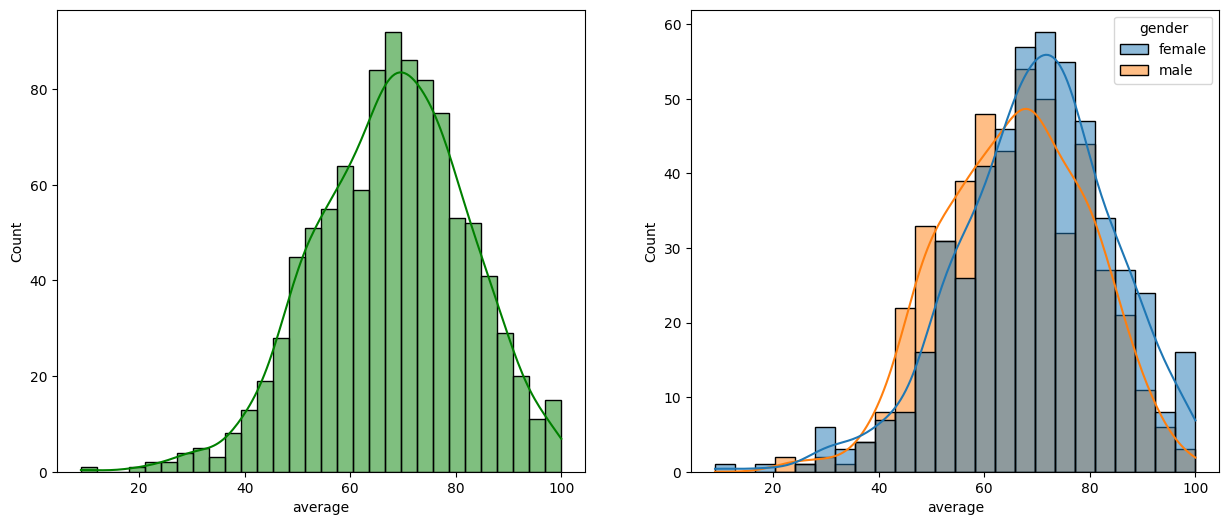

In [30]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df, x='average',bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

#### Insights:
- Female students performed well than male students.

<h1 style = "text-align: center">Model Training</h1>

In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor 
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('StudentsPerformance.csv')

In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables 

In [38]:
X = df.drop(columns=['math score'], axis=1)
y = df['math score']

In [40]:
# Create column transormer with 3 types of transformers 
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [47]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [48]:
X = preprocessor.fit_transform(X)

In [50]:
X.shape

(1000, 19)

In [52]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create and Evaluate Function to give all metric after model training

In [53]:
def evaluate_model(true, predicted): 
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_scr = r2_score(true, predicted)
    return mae, mse, r2_scr

In [58]:
models = {
    "Linear Regression" : LinearRegression(), 
    "Lasso" : Lasso(), 
    "Ridge" : Ridge(), 
    "K-Neighbors Regressor": KNeighborsRegressor(), 
    "Decision Tree": DecisionTreeRegressor(), 
    "Random Forest Regressor": RandomForestRegressor(), 
    "XGB Regressor": XGBRegressor(), 
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "CatBoosting Regressor": CatBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))): 
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # Make predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate models on train and test data 
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training dataset")
    print("  - Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("  - Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("  - R2 Score: {:.4f}".format(model_train_r2))
    print(20*'--')
    
    print("Model performance for Test dataset")
    print("  - Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("  - Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("  - R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print(20*'==')
    print()
    

Linear Regression
Model performance for Training dataset
  - Root Mean Squared Error: 28.3349
  - Mean Absolute Error: 4.2667
  - R2 Score: 0.8743
----------------------------------------
Model performance for Test dataset
  - Root Mean Squared Error: 29.0952
  - Mean Absolute Error: 4.2148
  - R2 Score: 0.8804

Lasso
Model performance for Training dataset
  - Root Mean Squared Error: 43.4784
  - Mean Absolute Error: 5.2063
  - R2 Score: 0.8071
----------------------------------------
Model performance for Test dataset
  - Root Mean Squared Error: 42.5064
  - Mean Absolute Error: 5.1579
  - R2 Score: 0.8253

Ridge
Model performance for Training dataset
  - Root Mean Squared Error: 28.3378
  - Mean Absolute Error: 4.2650
  - R2 Score: 0.8743
----------------------------------------
Model performance for Test dataset
  - Root Mean Squared Error: 29.0563
  - Mean Absolute Error: 4.2111
  - R2 Score: 0.8806

K-Neighbors Regressor
Model performance for Training dataset
  - Root Mean Squared

In [59]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.853903
8,CatBoosting Regressor,0.851632
7,AdaBoost Regressor,0.847685
6,XGB Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.749033


In [61]:
# Choose Linear Regression 
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100 
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


### Plot y_pred and y_test

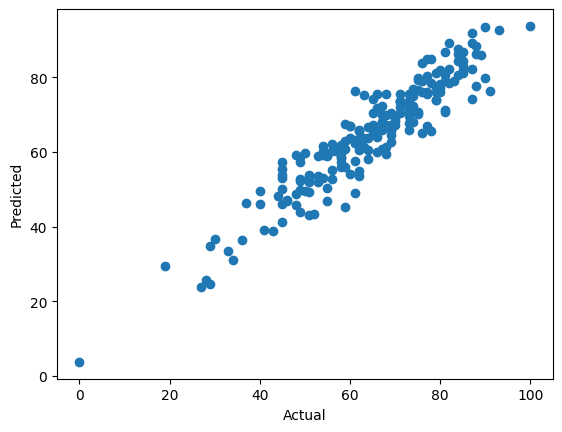

In [66]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math score'>

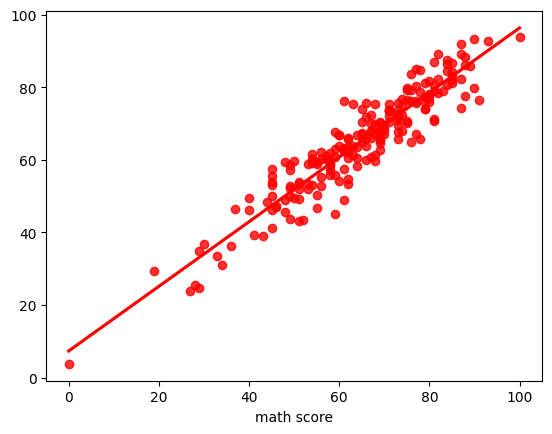

In [67]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='r')